<a href="https://colab.research.google.com/github/baxronovferuz1/DataScience_Np/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import fastai
fastai.__version__

'2.7.19'

In [3]:
torch.__version__

'2.6.0+cu124'

In [4]:
from fastai.vision.all import *

from ipywidgets import widgets

path=untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

# dataloaders
data_lds=ImageDataLoaders.from_name_func(path, get_image_files(path), valid=0.2, seed=40,label_func=is_cat, item_tfms=Resize(224))

# train
learn=cnn_learner(data_lds, resnet34, metrics=accuracy) #accuracy or error rate
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 152MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.148057,0.027227,0.991204,00:44


epoch,train_loss,valid_loss,accuracy,time
0,0.059460,0.067200,0.987821,00:45
1,0.033372,0.014023,0.995940,00:45


In [5]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [6]:
img=PILImage.create(upload.data[-1])
pred,_,prob=learn.predict(img)
print(f"It's Cat? :{pred} ")
print(f"Probablity: {prob[1].item():.3f}")

It's Cat? :True 
Probablity: 1.000


In [1]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 43.68 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [2]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9.1
    Uninstalling rsa-4.9.1:
      Successfully uninstalled rsa-4.9.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.


In [3]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 210


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 51779 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [4]:
from fastai.vision.all import *
from ipywidgets import widget

# path
path=Path("train")
# failed=verify_image(path)
# fls=get_image_files(path)
# fls

# DataBlock
transports=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#dataloaders
dls=transports.dataloaders(path)

# dls.train.show_batch(max_n=16, nrows=4)

# train
learn=cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 197MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.306246,0.354239,0.873016,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.479906,0.193204,0.944444,00:07
1,0.301448,0.191303,0.944444,00:08
2,0.218539,0.203395,0.928571,00:08


In [15]:
# failed

False

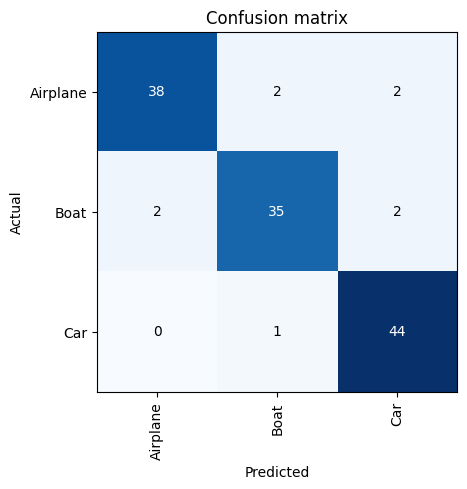

In [5]:
# check
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

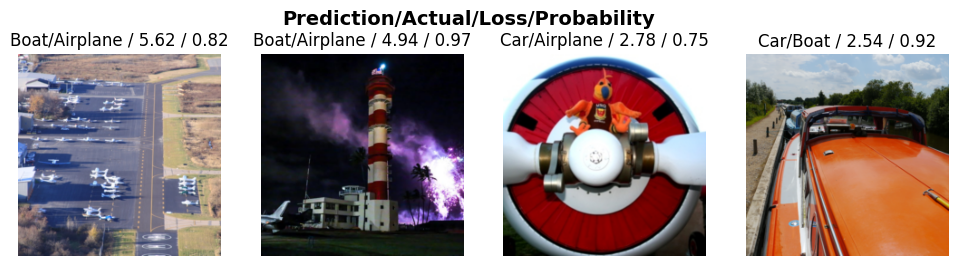

In [6]:
interp.plot_top_losses(4, nrows=1)

In [17]:
from ipywidgets import widgets

upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction:Airplane
Probablility:100.0%


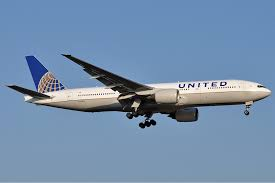

In [18]:
img=PILImage.create(upload.data[-1])
pred,pred_id,probs=learn.predict(img)
print(f"Prediction:{pred}")
print(f"Probablility:{probs[pred_id]*100:.1f}%")
img